Stock market analysts are continually looking for reliable predictors of stock price. Consider the problem of modelling the stock prce of Utility companies. Two variables that are thought to influence the stock price (Y) are return of average equity (ROE) and annual dividend rate.

1) Estimate the MLR equation from the given dataset<br>
2) Interpret the Adjusted R-Squared value<br>
3) Interpret the standard error of esitmate. Does it look like the prediction will be accurate?

In [1]:
# import reqd libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

import statsmodels.api as sm

In [2]:
# load the data
df = pd.read_csv("C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Regression-Models-main/MLR_Q10_StockPrice.csv")
df

,Electric Utility,Stock Price,ROE,Dividend
0,1,$23,13.7,2.36
1,2,$34,12.8,3.12
2,3,$20,6.9,2.48
3,4,$24,12.7,2.36
4,5,$20,15.3,1.92
5,6,$13,13.3,1.60
6,7,$33,14.6,3.08
7,8,$15,15.8,1.52
8,9,$26,12.0,2.72
9,10,$25,15.3,2.56


In [3]:
# Lets clean the response variable Stock Price to remove $
df['Stock Price'] = df['Stock Price'].apply(lambda x: int(x.replace('$','')))

In [4]:
# Lets check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Electric Utility  16 non-null     int64  
 1   Stock Price       16 non-null     int64  
 2   ROE               16 non-null     float64
 3   Dividend          16 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 640.0 bytes


Data types for the variables look appropriate

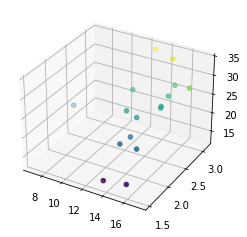

In [5]:
# Lets visualize the data
fig = plt.figure()
ax = plt.axes(projection='3d')

x1 = df['ROE']
x2 = df['Dividend']
y = df['Stock Price']

ax.scatter3D(x1, x2, y, c=y)

The absolute values for x1 and x2 are on different scales. x1 is 10 times larger than x2

### 1) Estimate the MLR equation from the given dataset

In [6]:
# Lets train the model
Y = df['Stock Price']
X = df[['ROE', 'Dividend']]

X = sm.add_constant(X)
reg_model = sm.OLS(Y,X).fit()
reg_model.summary()

C:\Users\Karthik.Iyer\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Stock Price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     84.31
Date:                Sat, 21 May 2022   Prob (F-statistic):           3.60e-08
Time:                        11:16:08   Log-Likelihood:                -29.298
No. Observations:                  16   AIC:                             64.60
Df Residuals:                      13   BIC:                             66.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9537      3.405     -2.923      0.012     -17.311      -2.597
ROE            0.4762      0.186      2.556      0.024       0.074       0.879
Dividend      11.1943      0.877     12.761      0.000       9.299      13.089
==============================================================================
Omnibus:                        0.526   Durbin-Watson:                   2.595
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.571
Skew:                           0.129   Prob(JB):                        0.752
Kurtosis:                       2.111   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Regression equation:**<br>
Stock Price = -9.9537 + 0.4762 * ROE + 11.1943 * Dividend

### 2) Interpret the standard error of esitmate. Does it look like the prediction will be accurate?

In [7]:
# Diff ways to calculate Standard Error
print(np.sqrt(np.sum((Y-reg_model.fittedvalues)**2)/(Y.shape[0]-2)))

print(np.sqrt(np.sum((reg_model.resid)**2)/(reg_model.df_resid)))

print(reg_model.scale**0.5)

1.6143900854943756
1.6753317667760277
1.6753317667760277


**The Standard Error is quiet small, and hence the model prediction should be good**

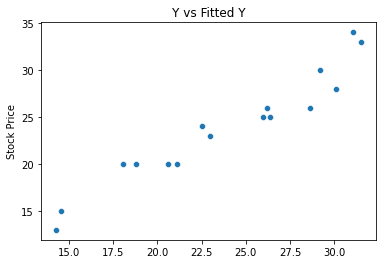

In [8]:
# Plot Y vs Fitted Y
ax = sns.scatterplot(x=reg_model.fittedvalues, y=Y)
ax.set_title('Y vs Fitted Y')
plt.show()